In [1]:
import numpy as np 
import keras
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences #pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Conv1D,MaxPooling1D
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical  #to convert an integer label into a vector 
import re #to use regular expression. Regular expressions are usually used for string matching
import warnings
warnings.filterwarnings('ignore')
import keras.callbacks
from keras.callbacks import CSVLogger
from keras.callbacks import TensorBoard
from pandas_ml import ConfusionMatrix
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

Using TensorFlow backend.


# Transfer learning

In [65]:
train_data = pd.read_csv('D:/sem2/signal processing/miyocardiac/Datas/ptbdb_abnormal.csv')


In [66]:
test_data = pd.read_csv('D:/sem2/signal processing/miyocardiac/Datas/ptbdb_normal.csv')

In [67]:
data=np.concatenate((train_data,test_data), axis=0)

In [68]:
data=np.array(data)
data.shape

(14550, 188)

In [69]:
x_train=data[:,0:187]
y_train=data[:,187]
y_train.shape

(14550,)

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

In [71]:
y_test.shape

(2910,)

In [72]:
y_label=y_test

In [73]:
scalar=Normalizer().fit(x_train)
x_train=scalar.transform(x_train)

In [74]:
scalar=Normalizer().fit(x_test)
x_test=scalar.transform(x_test)

In [75]:
num_classes=2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [76]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#input_shape=np.shape(x_train[0,:])
x_train.shape

(11640, 187, 1)

In [77]:
y_train.shape

(11640, 2)

In [78]:
from keras.models import load_model

In [79]:
model=load_model(".ipynb_checkpoints-01.hdf5")

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5952)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               761984    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 645       
Total params: 762,885
Trainable params: 762,885
Non-trainable params: 0
_________________________________________________________________


In [81]:
for layer in model.layers[:-3]:
    layer.trainable=False

In [82]:
for layer in model.layers:
    print(layer,layer.trainable)

<keras.layers.convolutional.Conv1D object at 0x0000010FB2F00208> False
<keras.layers.pooling.MaxPooling1D object at 0x0000010FB2F007B8> False
<keras.layers.core.Flatten object at 0x0000010FB2F00828> False
<keras.layers.core.Dense object at 0x0000010FB3003550> True
<keras.layers.core.Dropout object at 0x0000010FB3019780> True
<keras.layers.core.Dense object at 0x0000010FB3019208> True


In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5952)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               761984    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 645       
Total params: 763,141
Trainable params: 762,885
Non-trainable params: 256
_________________________________________________________________


In [84]:
model.add(Dense(2,activation='softmax'))

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5952)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               761984    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 645       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total para

In [86]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
input_shape=np.shape(x_test[0,:])
y_predict=model.predict_classes(x_test)

np.savetxt('expectedcheckpoint.txt',y_test,fmt='%01d')
np.savetxt('predictcheckpoint.txt',y_predict,fmt='%01d')
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
loss,accuracy=model.evaluate(x_test,y_test)
print("\nLoss: %.2f,Accuracy: %.2f%%" % (loss,accuracy*100))

2910/2910 [==============================] - 0s 135us/step

Loss: 0.93,Accuracy: 27.80%


In [87]:
y_predict.shape

(2910,)

In [88]:
y_label.shape

(2910,)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 798    5]
 [2096   11]]
Normalized confusion matrix
[[0.99 0.01]
 [0.99 0.01]]


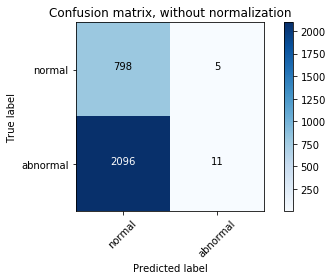

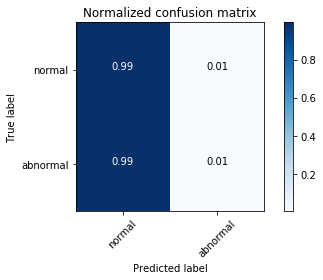

In [90]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_label, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal','abnormal'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal','abnormal'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [91]:
from sklearn.metrics import classification_report
sklearn.metrics.classification_report(y_label, y_predict)
target_names = ['normal', 'abnormal']
print(classification_report(y_label, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.28      0.99      0.43       803
    abnormal       0.69      0.01      0.01      2107

   micro avg       0.28      0.28      0.28      2910
   macro avg       0.48      0.50      0.22      2910
weighted avg       0.57      0.28      0.13      2910



In [93]:
a=sklearn.metrics.precision_score(y_label, y_predict, average=None)
print(a)

[0.28 0.69]


In [109]:
y_test.round()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [110]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_label,y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)


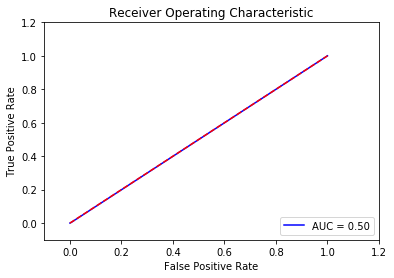

In [111]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()